# Principios básicos de Python 

En esta sección vamos a familiarizarnos con los tipos predefinidos de Python y cómo manejarlos para transformar los diferentes datos de nuestro programa. 

---
## Predefinidos, Variables y Expresiones

Python incorpora una serie de tipos predefinidos o primitivos como **enteros**, **flotantes**, **cadenas** o **booleanos**

```
42              # int 
4.2             # float
"forty-two"     # str
True            # bool
complex(1, -1)  # complex
```

---
## Variables

Una **variable** es un nombre al que asignamos algún valor. Para definir una variable en Python escribimos el nombre de la misma seguido del símbolo igual `=` más el valor que queremos asignarle

In [11]:
x = 42

Python tiene **tipado dinánimo**, es decir, no es necesario indicar al intérprete cuál es el tipo de cada variable, si no que lo infiere por sí solo en función de la forma en la que lo escribamos y la expresión en la que se utilice. 

Para obtener el tipo de un objeto utilizamos la función `type`

In [12]:
type(42)

int

Es posible escribir definiciones en las que explícitamente indiquemos el tipo con un fin meramente informativo

In [13]:
x: int = 42

El intérprete de Python ignorará por completo este tipado manual. Esta sintaxis puede ser útil a la hora de mejorar la legibilidad del código y también puede ser utilizado por herramientas de terceros que verifiquen la consistencia del mismo, pero no cambiaremos el tipo de la variable. Por ejemplo

In [14]:
x: str = 42
type(x)

int

En realidad una variable es un nombre simbólico que hace de referencia o puntero a un objeto que se crea en memoria. Una vez hemos asignado el objeto a nuestra variable, podemos referenciarla por su nombre. 

Por ejemplo, al crear la variable 
```
n = 300
```
estamos creando un objeto de tipo `int` con el valor 300 asignado a la variable `n`. 

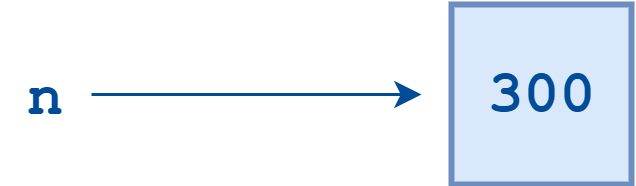

---
## Expresiones

Una **expresión** es una combinación de valores, variables y operadores que produce un resultado. 

Escribiendo expresiones podemos utilizar Python como si de una calculadora se tratara, utilizando las operaciones aritméticas habituales (`+`, `-`, `*`, `/`) con el orden habitual de estas.

```{code} 
2 + 2            # 4
50 - 5*6         # 20
(50 - 5*6) / 4   # 5.0
8 / 5            # 1.6
```

In [ ]:
2 + 3 * 4

14